## SEMINARSKA NALOGA

### PRIDOBITEV IN OBLIKOVANJE PODATKOV
 
Stolpci, ki opisujejo naše podatke so naslednji:  
* ZaporednaStevilkaKD,
* MesecStoritve,
* UraStoritve,
* DanVTednu,
* OrganizacijskaEnotaStoritve,
* Povratnik,
* OpisKD,
* PoglavjeKD,
* GospodarskiKriminal,
* OrganiziranKriminal,
* MladoletniskaKriminaliteta,
* Poskus,
* KriminalisticnaOznacba1,
* KriminalisticnaOznacba2,
* KriminalisticnaOznacba3,
* UporabljenoSredstvo1,
* UporabljenoSredstvo2,
* UporabljenoSredstvo3,
* UporabljenoSredstvo4,
* UpravnaEnota,
* OpisKraja,
* LetoZakljucnegaDokumenta,
* VrstaZakDokumenta,
* ZaporednaStevilkaOsebeVKD,
* VrstaOsebe,
* StarostniRazred,
* Spol,
* Drzavljanstvo,
* Poskodba,
* VplivAlkohola,
* VplivMamil,
* OrganiziranaZdruzba,
* Skoda

In [19]:
import pandas as pd
import glob
import warnings
import platform
from copy import copy
warnings.filterwarnings('ignore')

if (platform.system() == 'Windows'):
    l = glob.glob('data/*.csv')
    for i in range(len(l)):
        l[i] = l[i].split('\\')[-1].upper()

    # slovar poti do .csv datotek 
    csv_data = {data.split('\\')[1].split('.')[0].upper():data for data in glob.glob('data/*.csv')}
    
    # MAC IN LINUX IMATA DRUGACNE OZNAKE
else:
    l = glob.glob('data/*.csv')
    for i in range(len(l)):
        l[i] = l[i].split('/')[-1].upper()

    # slovar poti do .csv datotek 
    csv_data = {data.split('/')[1].split('.')[0].upper():data for data in glob.glob('data/*.csv')}

In [20]:
dataframes = {}
for key, value in csv_data.items():
    df = pd.read_csv(csv_data[key], sep=';', encoding='cp1250', skipinitialspace = True)
    dataframes[key.upper()] = df

for df1 in dataframes.values():
    df1.columns = ['MesecStoritve' if x == 'DatumStoritve' else x for x in df]

In [21]:
dataframes_copy = copy(dataframes)
#TODO: make a function that merges all dataframes into one dataframe
frames = [copy(dataframes_copy['KD2009'])]
for i in range(10, 21):
    frames.append(copy(dataframes_copy['KD20'+str(i)]))

all_data = pd.concat(frames)
all_data

# tu se naredi preslikava glede iz neberljive oblike datuma v berljivo obliko
mesci = ['Januar', 'Februar', 'Marec', 'April', 'Maj', 'Junij', 'Julij', 'Avgust', 'September', 'Oktober', 'November', 'December']
mesci2 = []
leta = []

# this dataframe is the one used for the analysis
full_KD = all_data
full_KD

for i in full_KD['MesecStoritve']:
    mesec = str(i)[:-4]
    leto = str(i)[-4:]

    leta.append(leto)
    mesci2.append(mesci[int(mesec) - 1])


full_KD.rename(columns={'MesecStoritve': 'CasovnaOznaka'}, inplace=True)
full_KD['MesecStoritve'] = mesci2
full_KD['LetoStoritve'] = leta

full_KD['LetoStoritve'] = full_KD['LetoStoritve'].astype(int)

In [22]:
color_pallete = ['#FF0170', '#F72585', '#B5179E', '#7209B7', '#560BAD', '#480CA8', '#3A0CA3', '#3F37C9', '#4361EE', '#4895EF', '#4CC9F0', '#82D8F2']

### ANALIZA PODATKOV GLEDE NA ČAS

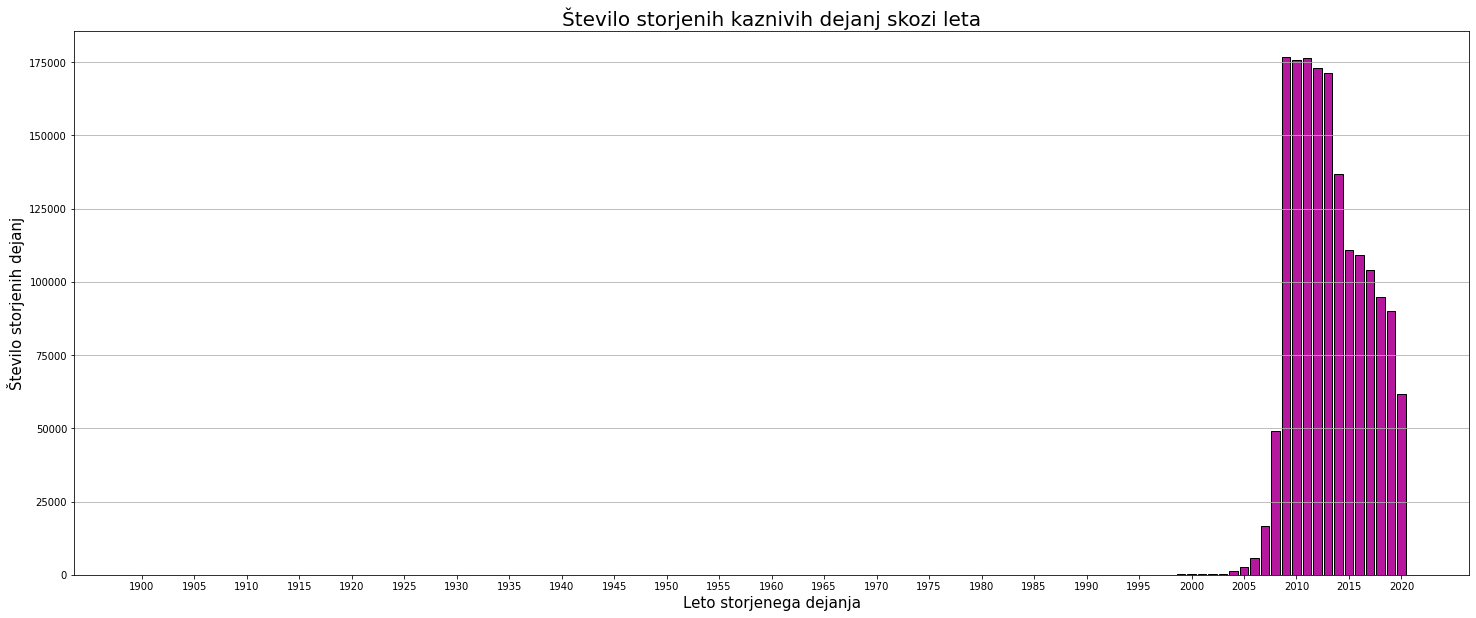

In [23]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

all_years = copy(all_data)
leta = all_years['LetoStoritve'].value_counts().sort_index()
x = list(leta.index)
y = list(leta)

plt.figure(figsize=(25,10))
plt.bar(x, y, color=color_pallete[2], edgecolor='black')
plt.grid(axis='y')
plt.title('Število storjenih kaznivih dejanj skozi leta', fontsize=20)
plt.xlabel('Leto storjenega dejanja', fontsize=15)
plt.ylabel('Število storjenih dejanj', fontsize=15)
plt.xticks(np.arange(x[0], x[-1]+5, step=5))
plt.show()

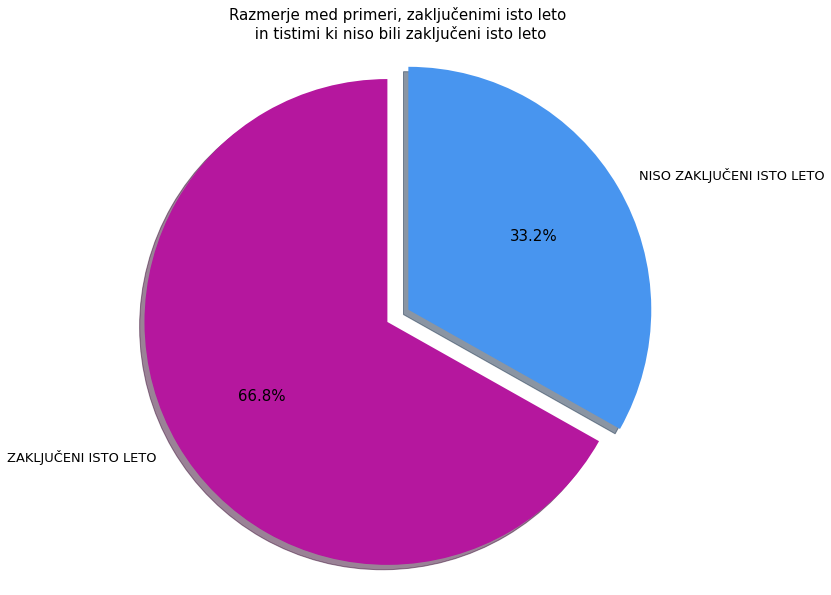

In [24]:
df_istoleto = copy(all_data)
df_not_istoleto = copy(all_data)
df_istoleto = df_istoleto[df_istoleto['LetoZakljucnegaDokumenta'] == df_istoleto['LetoStoritve']]
df_not_istoleto = df_not_istoleto[df_not_istoleto['LetoZakljucnegaDokumenta'] != df_not_istoleto['LetoStoritve']]
zalkjuceni_istoleto = len(df_istoleto)
ne_zalkjuceni_istoleto = len(df_not_istoleto)

x = ['ZAKLJUČENI ISTO LETO', 'NISO ZAKLJUČENI ISTO LETO']
y = [int(zalkjuceni_istoleto), int(ne_zalkjuceni_istoleto)]
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
fig1.set_size_inches(10,10)
patches, texts, autotexts = ax1.pie(y, explode=explode, labels=x, autopct='%1.1f%%', shadow=True, startangle=90, colors=[color_pallete[2], color_pallete[9]])
ax1.axis('equal')
ax1.set_title('Razmerje med primeri, zaključenimi isto leto\n in tistimi ki niso bili zaključeni isto leto', fontsize=15)
for t in autotexts:
    t.set_fontsize(15)
for t in texts:
    t.set_fontsize(13)
plt.show()

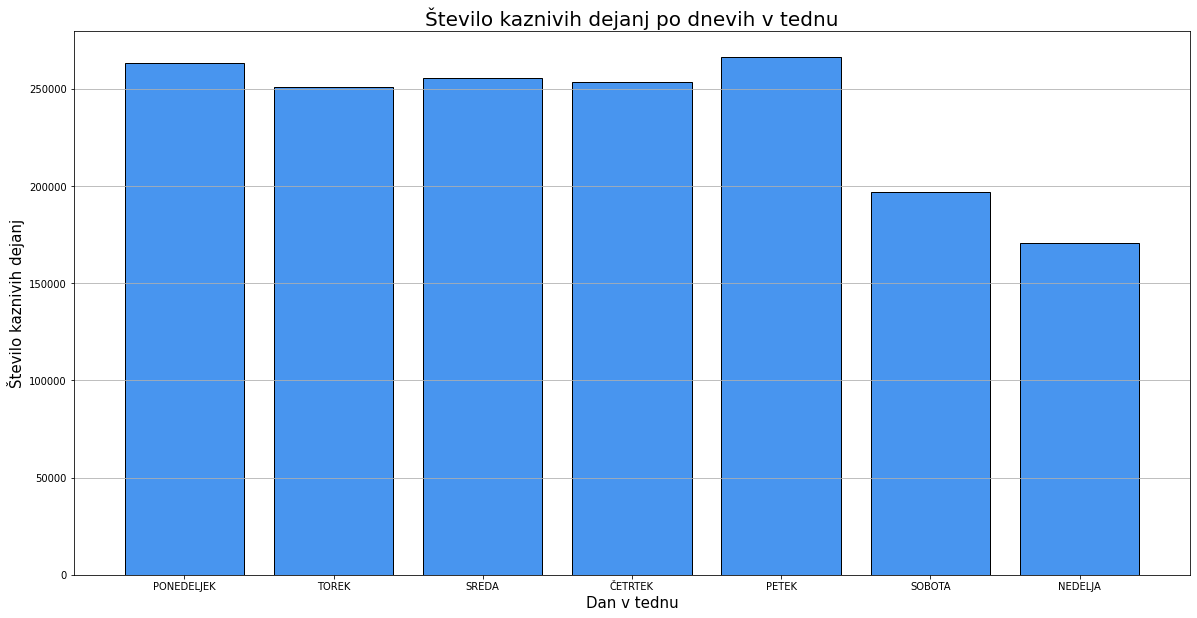

In [25]:
dnevi = all_years.DanVTednu.value_counts().sort_index()
x = ['PONEDELJEK', 'TOREK', 'SREDA', 'ČETRTEK', 'PETEK', 'SOBOTA', 'NEDELJA']
y = [dnevi.PONEDELJEK, dnevi.TOREK, dnevi.SREDA, dnevi.ČETRTEK, dnevi.PETEK, dnevi.SOBOTA, dnevi.NEDELJA]

plt.figure(figsize=(20,10))
plt.bar(x, y, color=color_pallete[9], edgecolor='black')
plt.title('Število kaznivih dejanj po dnevih v tednu', fontsize=20)
plt.xlabel('Dan v tednu', fontsize=15)
plt.ylabel('Število kaznivih dejanj', fontsize=15)
plt.grid(axis='y')
plt.show()

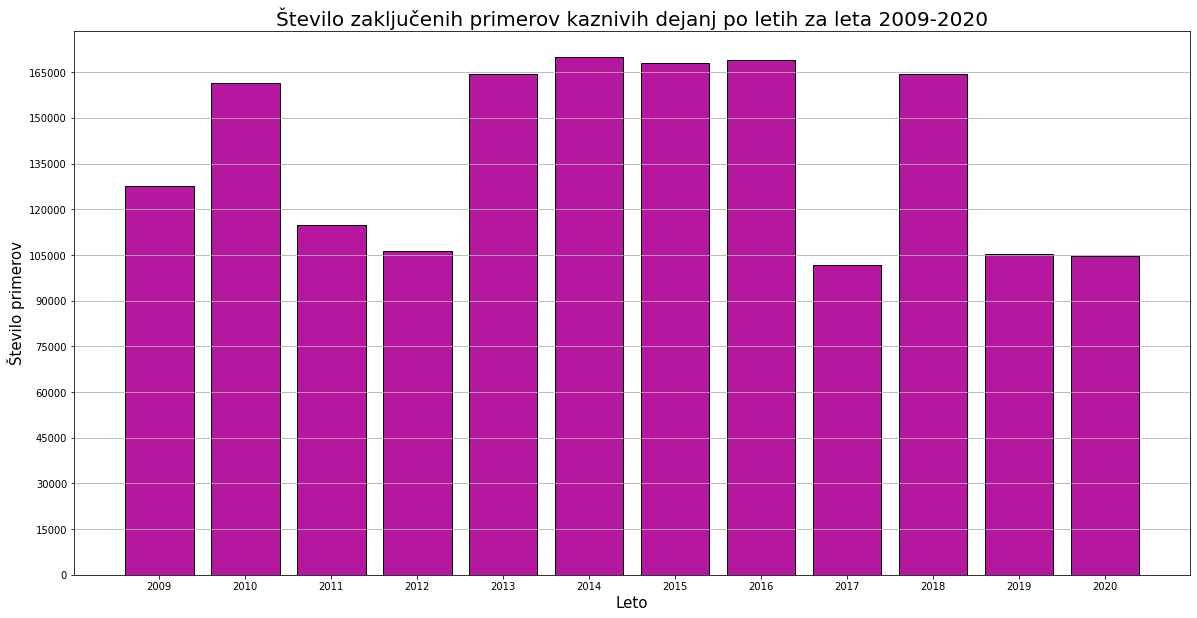

In [26]:
time_dataframes = {k:v for k,v in dataframes.items()}

l_df = copy(list(time_dataframes.values()))

po_letih = [len(df) for df in l_df]

plt.figure(figsize=(20,10))

# subplot 1. prikaz kriminalističih primerov po letih za leta 2009-2020
plt.bar(['2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020'], po_letih, color=color_pallete[2], edgecolor='black')
plt.yticks(np.arange(0, 180000, step=15000))
plt.grid(axis='y')
plt.title('Število zaključenih primerov kaznivih dejanj po letih za leta 2009-2020', fontsize=20)
plt.ylabel('Število primerov', fontsize=15)
plt.xlabel('Leto', fontsize=15)
plt.show()

**Ugotavljanje v katerih urah se zgodi največ kriminala**  
Pri tej analizi uporabimo podatke za vsa leta po stolpcu **UraStoritve** ter jih povprečimo da dobimo bolj splošne rezultate

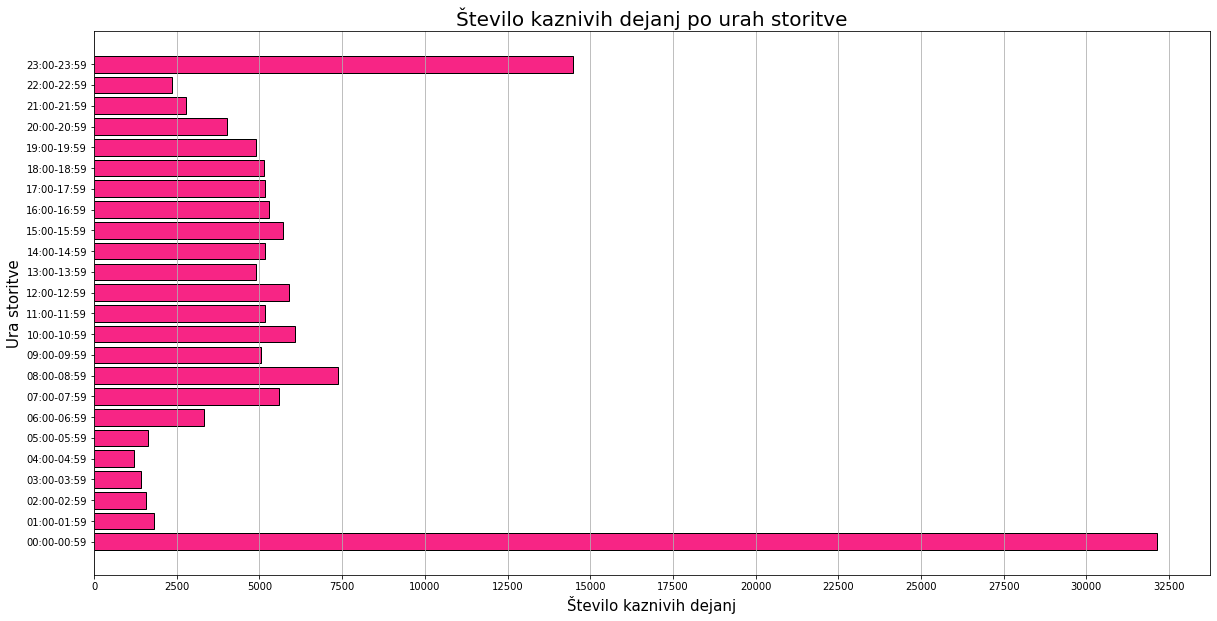

In [27]:
dataframes_fixed_dates = {}

for key, value in time_dataframes.items():
    df1 = copy(time_dataframes[key])
    df1['MesecStoritve'] = df1['MesecStoritve'].apply(lambda x: str(x)[:-4]+'.'+str(x)[-4:])
    df1['MesecStoritve'] =  pd.to_datetime(df1['MesecStoritve'], format='%m.%Y')
    dataframes_fixed_dates[key] = df1

ure_vse = []
povp_ure = []
ure = [
    '00:00-00:59',
    '01:00-01:59',
    '02:00-02:59',
    '03:00-03:59',
    '04:00-04:59',
    '05:00-05:59',
    '06:00-06:59',
    '07:00-07:59',
    '08:00-08:59',
    '09:00-09:59',
    '10:00-10:59',
    '11:00-11:59',
    '12:00-12:59',
    '13:00-13:59',
    '14:00-14:59',
    '15:00-15:59',
    '16:00-16:59',
    '17:00-17:59',
    '18:00-18:59',
    '19:00-19:59',
    '20:00-20:59',
    '21:00-21:59',
    '22:00-22:59',
    '23:00-23:59',
]

i = 0
for key, value in dataframes_fixed_dates.items():
    ure_vse.append(list(value['UraStoritve'].value_counts().sort_index()))
    i += 1

for i in range(len(ure_vse[1])):
    x = 0
    for ura in ure_vse:
        x += ura[i]
    povp_ure.append(x/len(ure_vse))

plt.figure(figsize=(20,10))
plt.barh(ure, povp_ure, color='#F72585', edgecolor='black')
plt.grid(axis='x')
plt.xticks(np.arange(0, 35000, step=2500))
plt.title('Število kaznivih dejanj po urah storitve', fontsize=20)
plt.ylabel('Ura storitve', fontsize=15)
plt.xlabel('Število kaznivih dejanj', fontsize=15)
plt.show()

**UGOTOVITVE:** Iz ugotovitev se največ kaznivih dejanj zgodi med **23:00 in 01:00**. To se zdi smiselno, saj večina ljudi takrat zapustijo lokale(verjetno vinjeni) in se zato zgodi več kaznivih dejanj. Število kaznivih dejanj pade v urah spanca **01:00-06:00** ter **21:00-23:00**. Podnevi kazniva dejanja narastejo, ampak še vedno ne tako kot med 23:00 in 01:00.

### ANALIZA PODATKOV GLEDE NA ORGANIZIRANO ZDRUŽBO

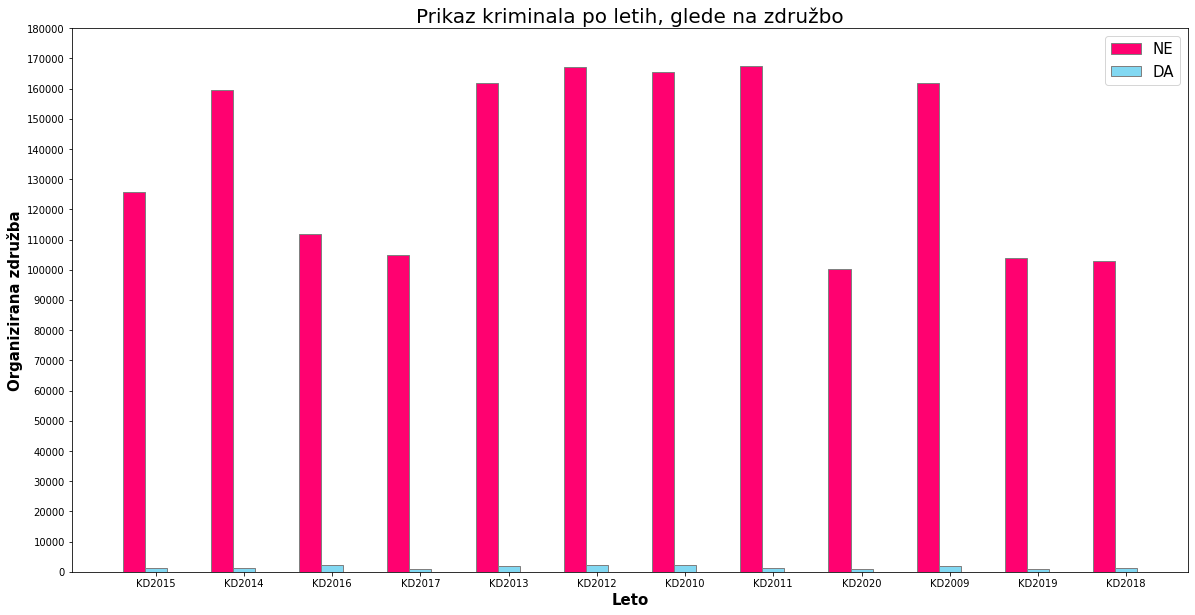

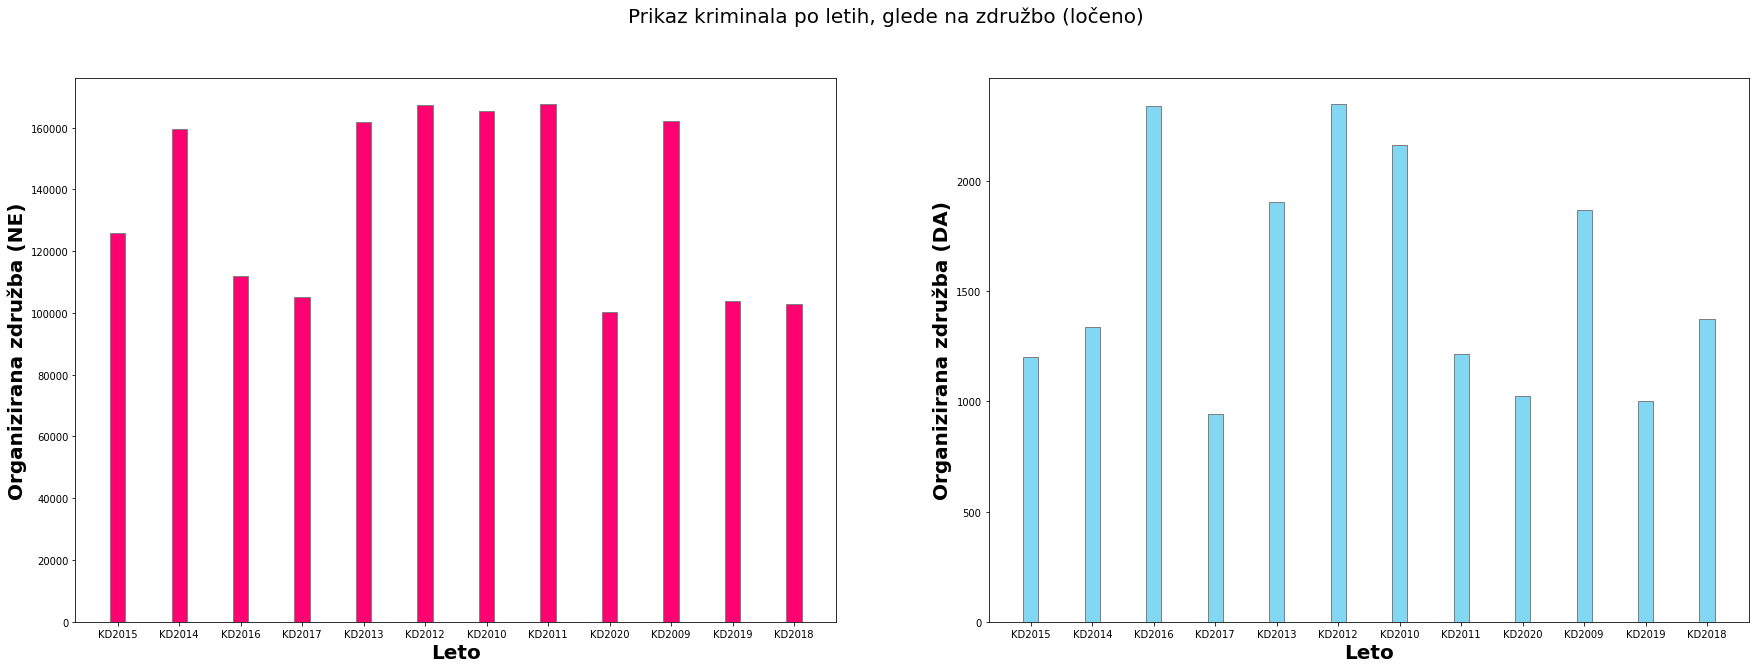

In [28]:
podatka = {}
podatki_NE = []
podatki_DA = []
ind = []

df = {k:v for k,v in dataframes.items()}

for key, value in df.items():
    df1 = copy(df[key])
    podatki = df1["OrganiziranaZdruzba"].value_counts()
    podatki_NE.append(podatki.values.tolist()[0])
    podatki_DA.append(podatki.values.tolist()[1])
    ind.append(key)

#Prikaz kriminala glede na združbo, lažje opažanje razlike
barWidth = 0.25
fig = plt.subplots(figsize =(20, 10))
br1 = np.arange(len(podatki_NE))
br2 = [x + barWidth for x in br1]

plt.title("Prikaz kriminala po letih, glede na združbo", fontsize=20)
plt.bar(br1, podatki_NE, color = '#FF0170', width = barWidth,
        edgecolor ='grey', label ='NE')
plt.bar(br2, podatki_DA, color ='#82D8F2', width = barWidth,
        edgecolor ='grey', label ='DA')
plt.xlabel('Leto', fontweight ='bold', fontsize = 15)
plt.ylabel('Organizirana združba', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(podatki_NE))], ind)
plt.yticks(np.arange(0,190000, step=10000))
plt.legend(fontsize=15)
plt.show()

#Prikaz kriminala glede na združbo ločeno, lažji prikaz števila
fg, (pl1, pl2) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [4,4]})
fg.set_size_inches(30,10)
fg.suptitle("Prikaz kriminala po letih, glede na združbo (ločeno)", fontsize=20)

pl1.bar(ind, podatki_NE ,color = '#FF0170', width = barWidth, edgecolor ='grey', label ='NE')
pl1.set_xlabel('Leto', fontweight ='bold', fontsize = 20)
pl1.set_ylabel('Organizirana združba (NE)', fontweight ='bold', fontsize = 20)

pl2.bar(ind, podatki_DA, color = '#82D8F2', width = barWidth, edgecolor ='grey', label ='DA')
pl2.set_xlabel('Leto', fontweight ='bold', fontsize = 20)
pl2.set_ylabel('Organizirana združba (DA)', fontweight ='bold', fontsize = 20)

plt.show()

**UGOTOVITVE:** Iz grafov je kar najbolje razvidno, da v Sloveniji v vseh teh letih ni prišlo do večjega števila kriminala v organiziranih združbah, kar pomeni, da so skoraj vsi kriminalci, posamezniki. Razlika je vidna predvsem v 1. grafu, ki prikazuje obe vrednosti skupaj. Nato sta pod njim še razčlenjeni verziji za lažjo berljivost številk.

### Prikaz podatkov glede na mladoletnost in vpletenost v organizirane združbe

TypeError: set_ticks() takes 2 positional arguments but 3 were given

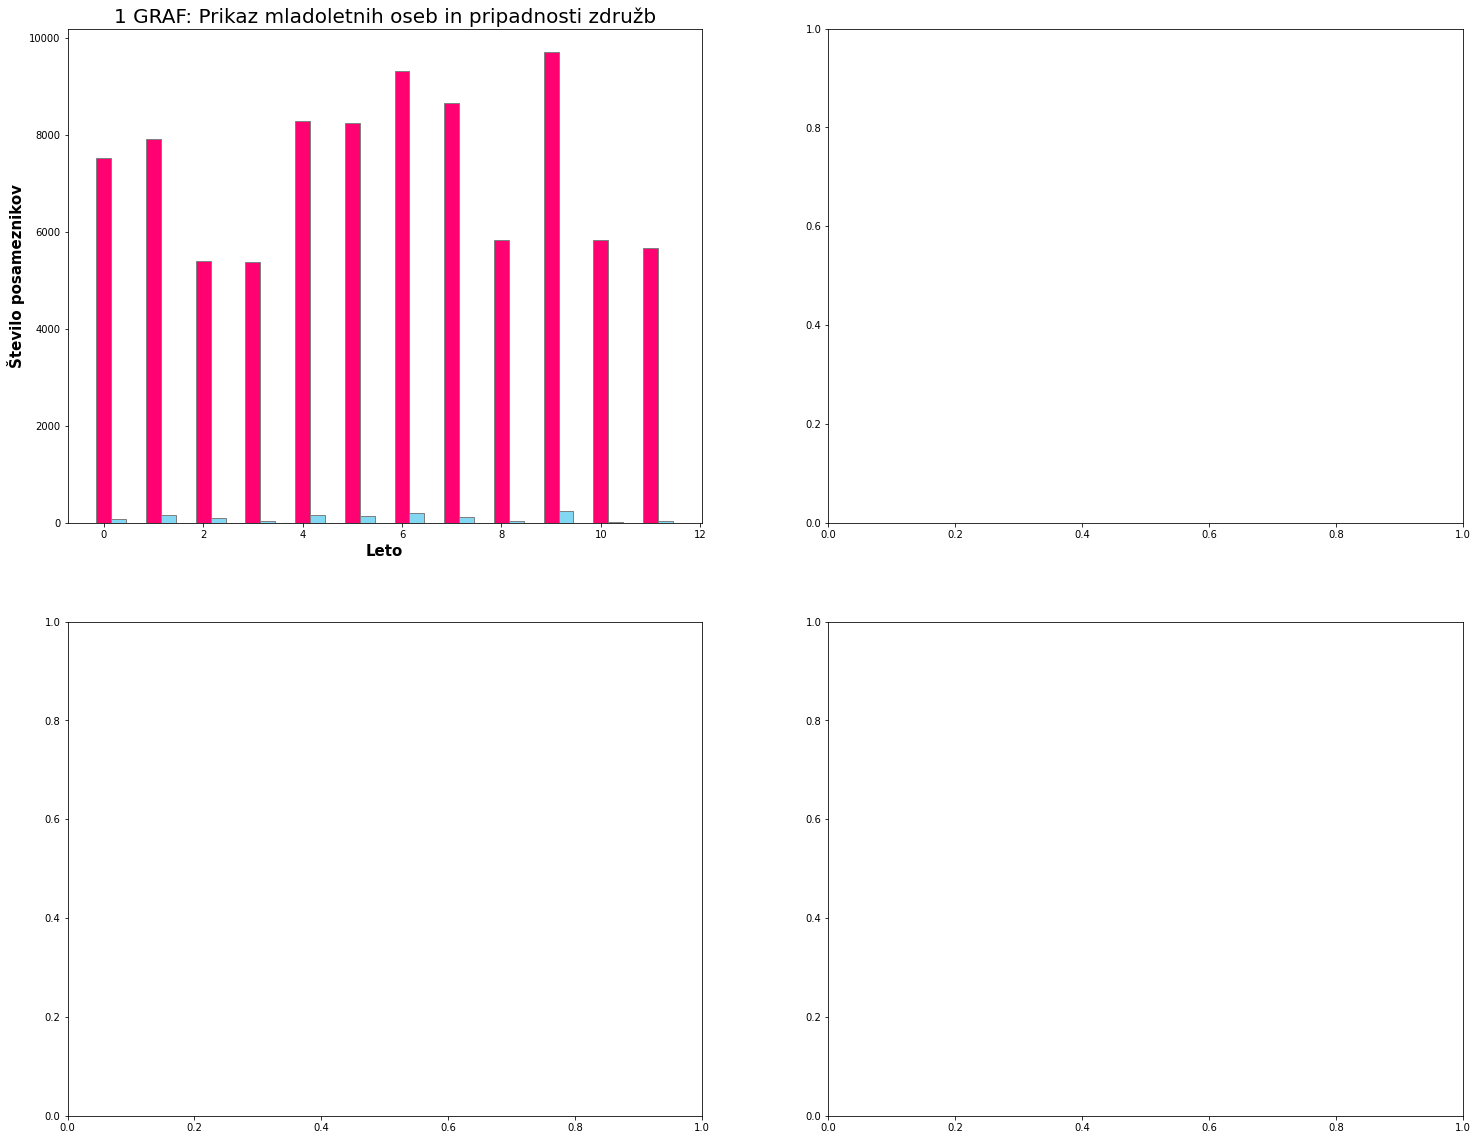

In [29]:
mladoleten_NE = []
mladoleten_DA = []
ne_mladoleten_NE = []
ne_mladoleten_DA = []

df = {k:v for k,v in dataframes.items()}

for key, value in df.items():
    df1 = copy(dataframes[key])
    je_mladoleten = ((df1["StarostniRazred"] == "00-07") | (df1["StarostniRazred"] == "41821") | (df1["StarostniRazred"] == "14-16") | (df1["StarostniRazred"] == "16-18"))
    mladoleten_NE.append(df1[je_mladoleten]["OrganiziranaZdruzba"].value_counts()[0])
    mladoleten_DA.append(df1[je_mladoleten]["OrganiziranaZdruzba"].value_counts()[1])
    ne_mladoleten_NE.append(df1[~je_mladoleten]["OrganiziranaZdruzba"].value_counts()[0])
    ne_mladoleten_DA .append(df1[~je_mladoleten]["OrganiziranaZdruzba"].value_counts()[1])  


barWidth = 0.30
fig, ((pl1, pl2), (pl3, pl4)) = plt.subplots(2,2, figsize =(25, 20))

X_axis = np.arange(len(ind))

#Prikaz mladoletnih in pripadnosti zbružbam
pl1.title.set_text("1 GRAF: Prikaz mladoletnih oseb in pripadnosti združb")
pl1.title.set_fontsize(20)
pl1.bar(X_axis, mladoleten_NE, color = '#FF0170', width = barWidth,
        edgecolor ='grey', label ='NE: MLADOLETNA OSEBA')
pl1.bar(X_axis+barWidth, mladoleten_DA, color ='#82D8F2', width = barWidth,
        edgecolor ='grey', label ='DA: MLADOLETNA OSEBA')
pl1.set_xlabel('Leto', fontweight ='bold', fontsize = 15)
pl1.set_ylabel('Število posameznikov', fontweight ='bold', fontsize = 15)
pl1.set_xticks([r+0.15 for r in range(len(ind))], ind)
pl1.legend(loc='upper right')

#Prikaz ne mladoletnih in pripadnosti zbružbam
pl2.title.set_text("2. GRAF: Prikaz ne mladoletnih oseb in pripadnosti združb")
pl2.title.set_fontsize(20)
pl2.bar(X_axis, ne_mladoleten_NE, color = '#FF0170', width = barWidth,
        edgecolor ='grey', label ='NE: NE MLADOLETNA OSEBA')
pl2.bar(X_axis+barWidth, ne_mladoleten_DA, color ='#82D8F2', width = barWidth,
       edgecolor ='grey', label ='DA: NE MLADOLETNA OSEBA')
pl2.set_xlabel('Leto', fontweight ='bold', fontsize = 15)
pl2.set_ylabel('Število posameznikov', fontweight ='bold', fontsize = 15)
pl2.set_xticks([r+0.15 for r in range(len(ind))], ind)
pl2.legend(loc='upper right')

#Primerjava mladoletnih in ne  mladoletnih in pripadnosti zbružbam (NE)
pl3.title.set_text("3. GRAF: Mladoletni in ne mladoletni: Ne pripada zbružbi")
pl3.title.set_fontsize(20)
pl3.bar(X_axis, mladoleten_NE, color = '#FF0170', width = barWidth,
        edgecolor ='grey', label ='NE: MLADOLETNA OSEBA')
pl3.bar(X_axis+barWidth, ne_mladoleten_NE, color ='#82D8F2', width = barWidth,
        edgecolor ='grey', label ='NE: NE MLADOLETNA OSEBA')
pl3.set_xlabel('Leto', fontweight ='bold', fontsize = 15)
pl3.set_ylabel('Število posameznikov', fontweight ='bold', fontsize = 15)
pl3.set_xticks([r+0.15 for r in range(len(ind))], ind)
pl3.legend(loc='upper right')

#Primerjava mladoletnih in ne  mladoletnih in pripadnosti zbružbam (DA)
pl4.title.set_text("4. GRAF: Mladoletni in ne mladoletni: Pripada zbružbi")
pl4.title.set_fontsize(20)
pl4.bar(X_axis, mladoleten_DA, color = '#FF0170', width = barWidth,
        edgecolor ='grey', label ='DA: MLADOLETNA OSEBA')
pl4.bar(X_axis+barWidth, ne_mladoleten_DA, color ='#82D8F2', width = barWidth,
        edgecolor ='grey', label ='DA: NE MLADOLETNA OSEBA')
pl4.set_xlabel('Leto', fontweight ='bold', fontsize = 15)
pl4.set_ylabel('Število posameznikov', fontweight ='bold', fontsize = 15)
pl4.set_xticks([r+0.15 for r in range(len(ind))], ind)
pl4.legend(loc='upper right')

plt.show()

**UGOTOVITVE:** Iz zgornjih grafov lahko vidimo naslednje:
* **1. GRAF:** Ta graf prikazuje število mladoletnih oseb, ki so med izvajanjem kriminala pripadali ali ne pripadali oziroma bi udeleženi ali ne udeleženi v neko organizirano združbo. Razberemo lahk0, da je bilo v vsakem letu zelo malo takih mladoletnih, ki so pripadali kaki organizirani združbi.
* **2. GRAF:** Ta graf prikazuje število NE mladoletnih oseb (osebe starejše ob 18 let), ki so pripadali ali ne pripadali neki združbi. Tudi tukaj vidimo, da so take osebe bolj redko bile udeležene v kriminalu in ob enem pripadale zbružbi.
* **3. GRAF:** Tukaj pa graf prikazuje kombinacijo mladoletnih in ne mladoletnih, z vrednostjo NE. Torej vse osebe, ki NISO bile udeležene v neko združbo. Iz grafa lahko razberemo, da se mladoletne osebe znajo paziti bolje kot ne mladoletne osebe.
* **4. GRAF:** Ta graf pa prikazuje enako kombinacijo kot 3. graf, le da z vrednostjo DA. Torej vse osebe, ki so bile del zbružbe ob izvajanju kriminala. Tukaj se malo bolje razbere koliko približno je takih "pajdašev", ki so del neke organizirane združbe. 

# PRIKAZ PODATKOV GLEDE NA KRAJ

V tem sklopu si bomo ogledali različne vizualizacije, ki se osedotočajo na ***lokacijo kriminalne storitve***.
Pogledali si bomo tudi kraj v povezavi z drugimi zanimivejšimi atributi. Kraj načeloma lahko določamo glede na ***upravno enoto***, kjer je bil kriminal storjen. Prav tako pa lahko pogledamo, katera ***policijska uprava*** je prijavila kriminal.

In [30]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from copy import copy
dataframes_copy = copy(dataframes)

In [31]:
"""#TODO: make a function that merges all dataframes into one dataframe
frames = [copy(dataframes_copy['KD2009'])]
for i in range(10, 21):
    frames.append(copy(dataframes_copy['KD20'+str(i)]))

all_data = pd.concat(frames)
pd.set_option('max_columns', None)"""

"#TODO: make a function that merges all dataframes into one dataframe\nframes = [copy(dataframes_copy['KD2009'])]\nfor i in range(10, 21):\n    frames.append(copy(dataframes_copy['KD20'+str(i)]))\n\nall_data = pd.concat(frames)\npd.set_option('max_columns', None)"

In [32]:
# this dataframe is the one used for the analysis
full_KD = all_data

In [33]:
"""# tu se naredi preslikava glede iz neberljive oblike datuma v berljivo obliko
mesci = ['Januar', 'Februar', 'Marec', 'April', 'Maj', 'Junij', 'Julij', 'Avgust', 'September', 'Oktober', 'November', 'December']
mesci2 = []
leta = []
popravlena_cas = []

for i in full_KD['MesecStoritve']:
    mesec = str(i)[:-4]
    leto = str(i)[-4:]

    leta.append(leto)
    popravlena_cas.append(leto+mesec)
    mesci2.append(mesci[int(mesec) - 1])

full_KD.rename(columns={'MesecStoritve': 'CasovnaOznaka'}, inplace=True)
full_KD['MesecStoritve'] = mesci2
full_KD['LetoStoritve'] = leta
full_KD['CasovnaOznaka'] = popravlena_cas"""

"# tu se naredi preslikava glede iz neberljive oblike datuma v berljivo obliko\nmesci = ['Januar', 'Februar', 'Marec', 'April', 'Maj', 'Junij', 'Julij', 'Avgust', 'September', 'Oktober', 'November', 'December']\nmesci2 = []\nleta = []\npopravlena_cas = []\n\nfor i in full_KD['MesecStoritve']:\n    mesec = str(i)[:-4]\n    leto = str(i)[-4:]\n\n    leta.append(leto)\n    popravlena_cas.append(leto+mesec)\n    mesci2.append(mesci[int(mesec) - 1])\n\nfull_KD.rename(columns={'MesecStoritve': 'CasovnaOznaka'}, inplace=True)\nfull_KD['MesecStoritve'] = mesci2\nfull_KD['LetoStoritve'] = leta\nfull_KD['CasovnaOznaka'] = popravlena_cas"

In [34]:
full_KD['LetoStoritve'] = full_KD['LetoStoritve'].astype(int)

In [35]:
full_KD['CasovnaOznaka'] = full_KD['CasovnaOznaka'].astype(int)

## Kriminal po posameznih občinah
Najprej najsplošnejša analiza. Kje je največ kriminala. Očitno je zelo veliko kriminala v občini Ljubljana. Sledi ji Murska Sobota, nato Maribor. Sklepamo lahko da imajo **večje, številnejše občine več primerov kriminala**. 

<AxesSubplot:title={'center':'Stevilo kaznivih dejanj po upravnih enotah'}, xlabel='UpravnaEnotaStoritve', ylabel='Stevilo kaznivih dejanj'>

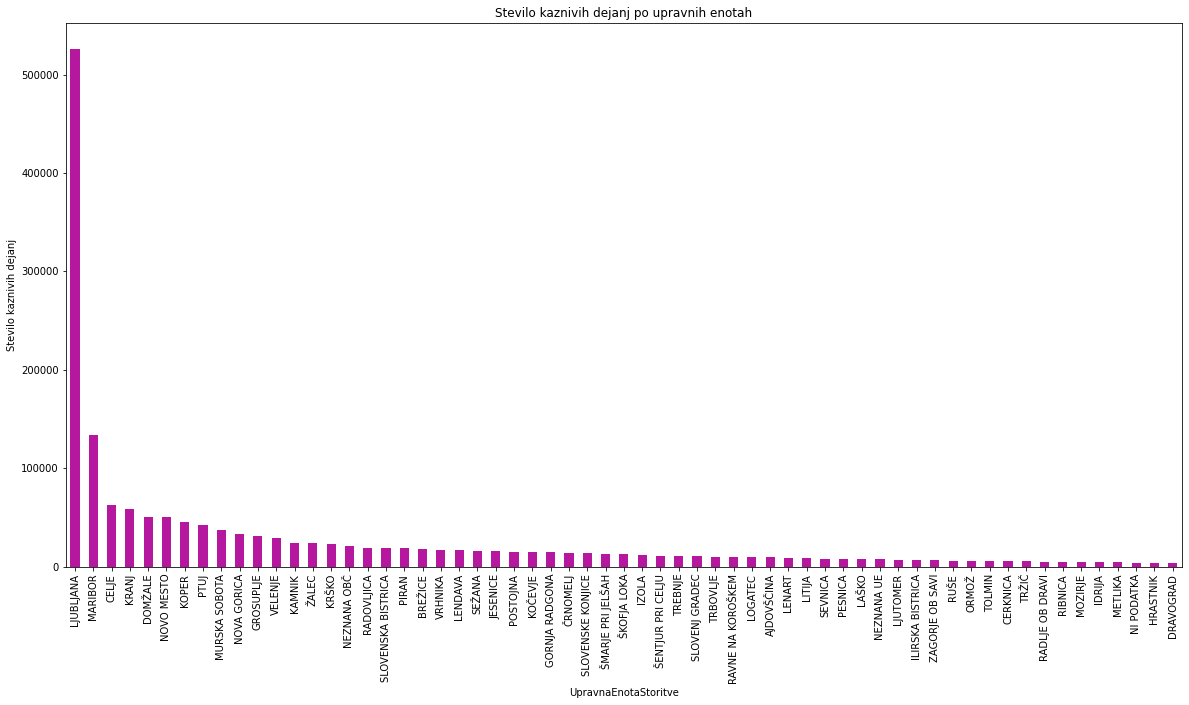

In [36]:
plt.figure(figsize=(20,10))
full_KD.groupby(['UpravnaEnotaStoritve']).size().sort_values(ascending=False).plot(kind='bar', ylabel='Stevilo kaznivih dejanj', title='Stevilo kaznivih dejanj po upravnih enotah', color=color_pallete[2])

## Kriminal po posameznih občinah po letu 2001
Ker sem opazil tudi primere iz leta 1945 (zelo stare primere). Sem pogledal še graf po letu rojstva članov naše ekipe. Dobil sem dovolj podobne rezultate. Gotovo so bili starejši primeri bolj redki.

<AxesSubplot:title={'center':'Stevilo kaznivih dejanj po upravnih enotah po letu 2001'}, xlabel='UpravnaEnotaStoritve', ylabel='Stevilo kaznivih dejanj'>

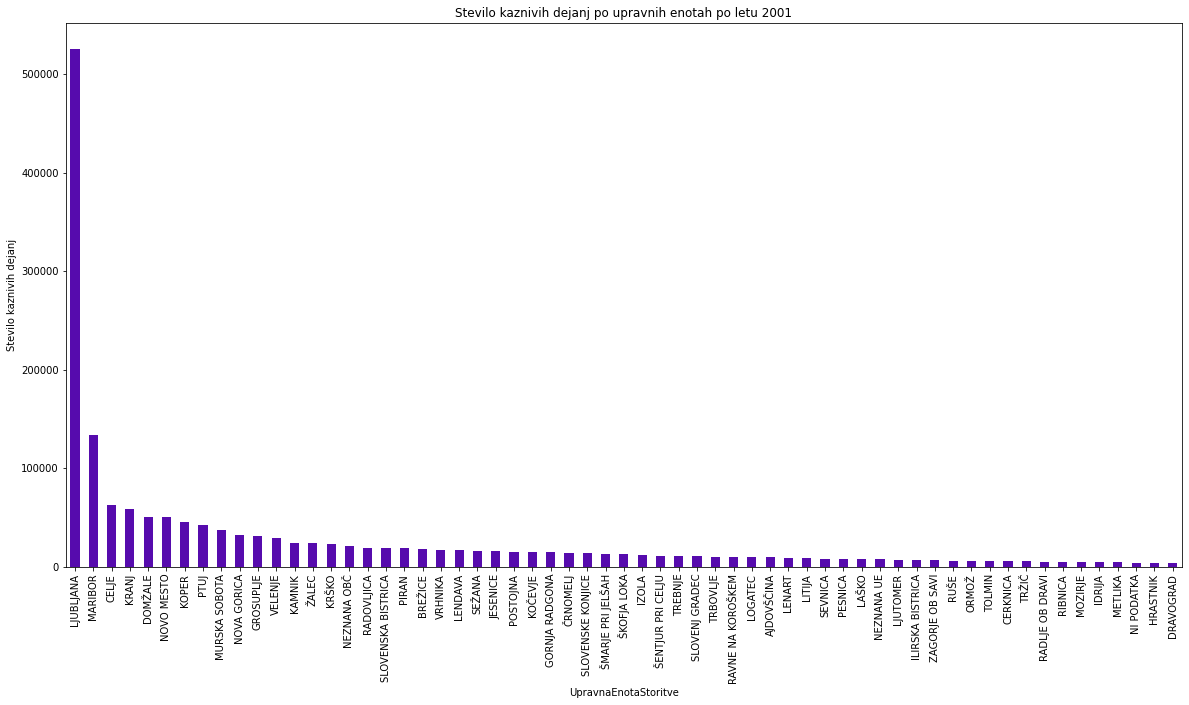

In [37]:
after_2001_KD = full_KD[full_KD['LetoStoritve'] > 2001]
plt.figure(figsize=(20,10))
after_2001_KD.groupby(['UpravnaEnotaStoritve']).size().sort_values(ascending=False).plot(kind='bar', ylabel='Stevilo kaznivih dejanj', title='Stevilo kaznivih dejanj po upravnih enotah po letu 2001', color=color_pallete[4])

## Kriminal po posameznih občinah po letu 2018
To sem si ogledal samo zato, da vidim bolj sodobne podatke. Med grafi lahko opazimo da je kriminal v določenih krajih upadel. V določenih pa narastel. Lep primer tega je Novo mesto, kjer je kriminal mocno narastel.

<AxesSubplot:title={'center':'Stevilo kaznivih dejanj po upravnih enotah po letu 2018'}, xlabel='UpravnaEnotaStoritve', ylabel='Stevilo kaznivih dejanj'>

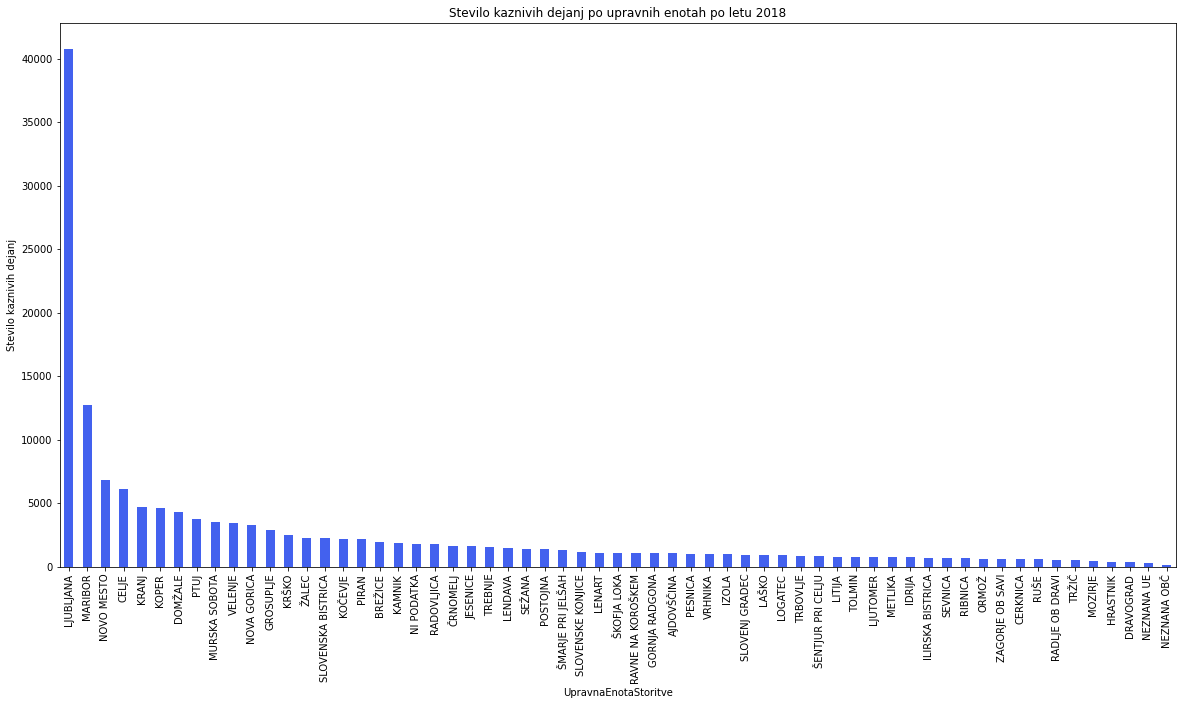

In [38]:
after_2018_KD = full_KD[full_KD['LetoStoritve'] > 2018]
plt.figure(figsize=(20,10))
after_2018_KD.groupby(['UpravnaEnotaStoritve']).size().sort_values(ascending=False).plot(kind='bar', ylabel='Stevilo kaznivih dejanj', title='Stevilo kaznivih dejanj po upravnih enotah po letu 2018', color=color_pallete[8])

## Morebitna korelacija med stevilom prebivalstva in krajem
Ob gledanju grafa si človek ahko misli, da je Ljubljana vodilna zgolj zaradi **številčnosti prebivalstva**. Pa si poglejmo morebitne korelacije med kriminalom in številom prebivalstva.

In [39]:
from selenium import webdriver
from bs4 import BeautifulSoup
from selenium.webdriver.common.by import By
import requests

page = requests.get('https://sl.wikipedia.org/wiki/Seznam_občin_v_Sloveniji')
soup = BeautifulSoup(page.content, 'html.parser')
table = soup.find('table', attrs={'class':'wikitable sortable'})
table_body = table.find('tbody')
rows = table_body.find_all('tr')
slovar = {}
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    if cols:
        obcina = cols[0].upper()
        # povrsina (km2), prebivalci (stevilo), prebivalci na km2 (p/km2)
        povrsina = cols[1]
        povrsina = povrsina.replace(',', '.')
        prebilci = cols[2]
        prebilci_na_km2 = cols[3]
        prebilci_na_km2 = prebilci_na_km2.replace(',', '.')
        slovar[obcina] = [povrsina, prebilci, prebilci_na_km2]
        # [0] = povrsina, [1] = prebilci, [2] = prebilci na km2
        

In [40]:
from collections import defaultdict

seznam = []
for i in range(2001, 2021):
    seznam.append(full_KD[full_KD['LetoStoritve'] == i].groupby(['UpravnaEnotaStoritve']).size())

slovar1 = defaultdict(lambda:0)
for serija in seznam:
    for obcina, stevilo in serija.items():
        slovar1[obcina] += int(stevilo)

for obcina in slovar1:
    slovar1[obcina] = slovar1[obcina] / len(seznam)

serija = pd.Series(slovar1)
dataFrame = pd.DataFrame(serija.sort_values(ascending=False))
dataFrame.columns = [0]
dataFrame.reset_index(inplace=True)
dataFrame.columns = ['UpravnaEnotaStoritve', 0]
dataFrame

,UpravnaEnotaStoritve,0
0,LJUBLJANA,26278.50
1,MARIBOR,6691.45
2,CELJE,3145.15
3,KRANJ,2948.90
4,DOMŽALE,2532.35
...,...,...
56,IDRIJA,249.45
57,METLIKA,240.15
58,NI PODATKA,212.35
59,HRASTNIK,194.45


<AxesSubplot:title={'center':'Kriminal_na_km2 po upravnih enotah'}, xlabel='UpravnaEnota', ylabel='Kriminal_na_km2'>

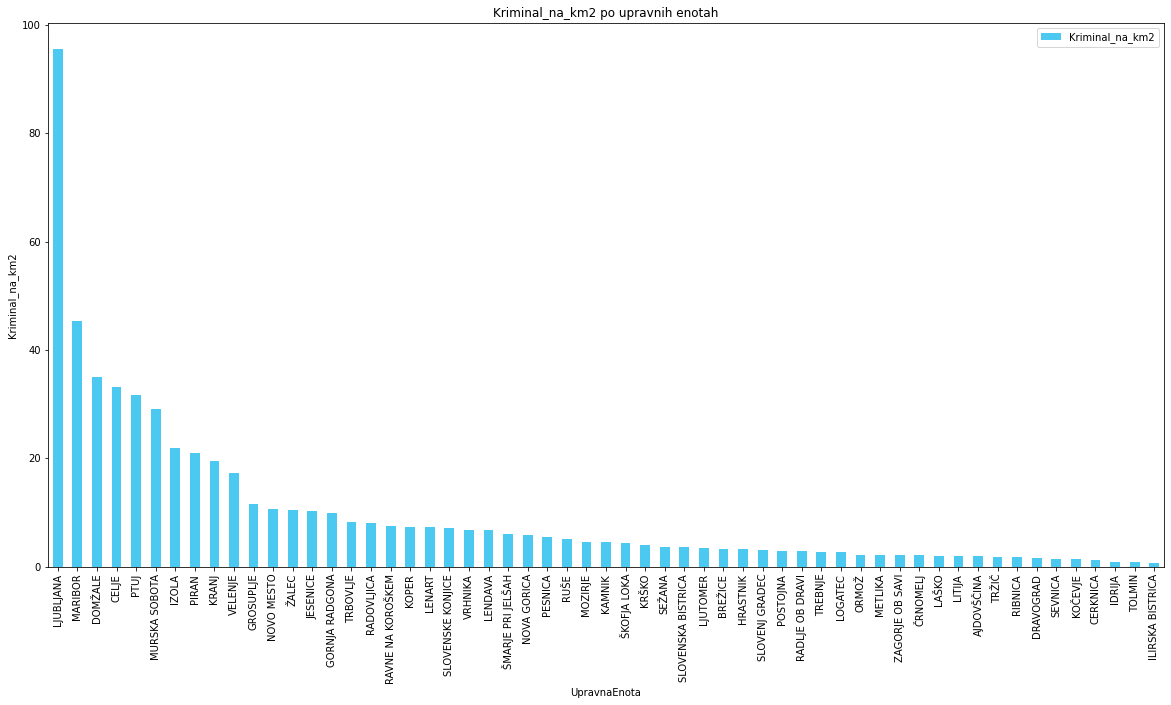

In [41]:
df = copy(dataFrame)
df.rename(columns={0: 'SteviloKriminala'}, inplace=True)
for index, row in df.iterrows():
    if  row['UpravnaEnotaStoritve'] in slovar:
        df.at[index, 'SteviloKriminala'] = int(row['SteviloKriminala'])/float(slovar[row['UpravnaEnotaStoritve']][0])
    else:
        df.drop(index, inplace=True)

df.sort_values(by=['SteviloKriminala'], ascending=False, inplace=True)
df.rename(columns={'SteviloKriminala': 'Kriminal_na_km2'}, inplace=True)
df.rename(columns={'UpravnaEnotaStoritve': 'UpravnaEnota'}, inplace=True)


#plt.bar(df['UpravnaEnota'], df['Kriminal_na_km2'], color="blue")
df.plot(kind='bar', ylabel='Kriminal_na_km2',x='UpravnaEnota', title='Kriminal_na_km2 po upravnih enotah', figsize=(20,10), color=color_pallete[10])

<AxesSubplot:title={'center':'Kriminal_na_prebivalca po upravnih enotah'}, xlabel='UpravnaEnota', ylabel='Kriminal_na_prebivalca'>

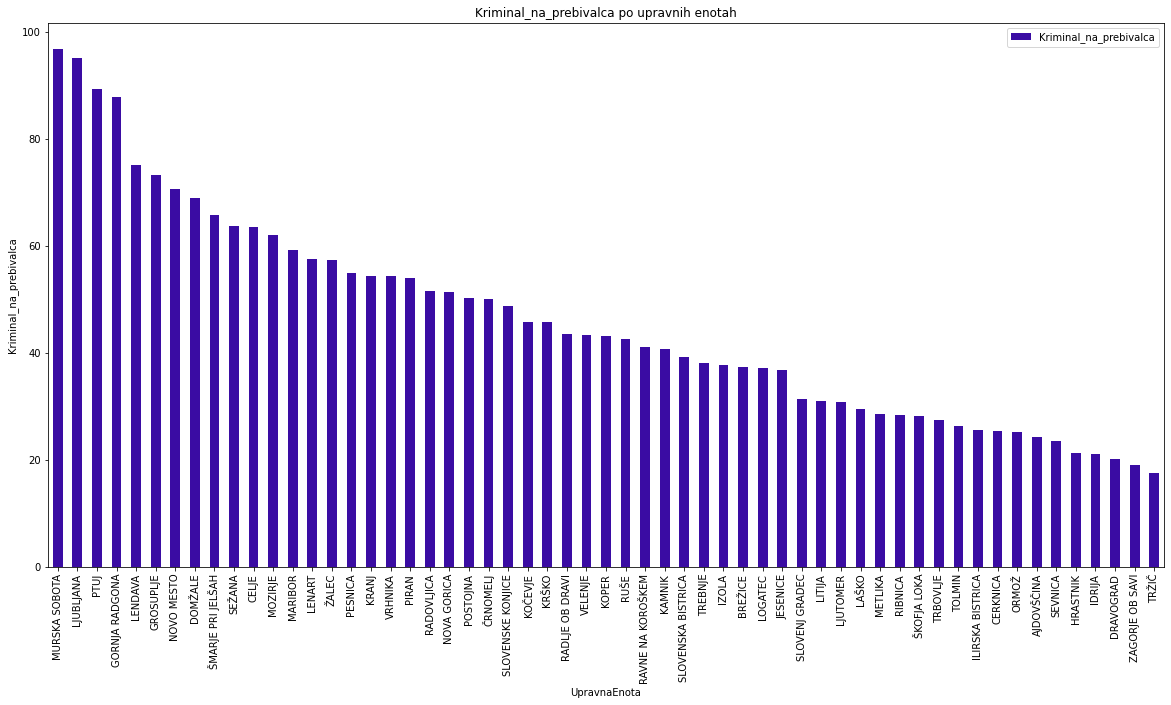

In [42]:
df = copy(dataFrame)
df.rename(columns={0: 'SteviloKriminala'}, inplace=True)
for index, row in df.iterrows():
    if  row['UpravnaEnotaStoritve'] in slovar:
        df.at[index, 'SteviloKriminala'] = int(row['SteviloKriminala'])/float(slovar[row['UpravnaEnotaStoritve']][1])
    else:
        df.drop(index, inplace=True)

df.sort_values(by=['SteviloKriminala'], ascending=False, inplace=True)
df.rename(columns={'SteviloKriminala': 'Kriminal_na_prebivalca'}, inplace=True)
df.rename(columns={'UpravnaEnotaStoritve': 'UpravnaEnota'}, inplace=True)


#plt.bar(df['UpravnaEnota'], df['Kriminal_na_km2'], color="blue")
df.plot(kind='bar', ylabel='Kriminal_na_prebivalca',x='UpravnaEnota', title='Kriminal_na_prebivalca po upravnih enotah', figsize=(20,10), color=color_pallete[6])

<AxesSubplot:title={'center':'Kriminal_na_prebivalca/km2 po upravnih enotah'}, xlabel='UpravnaEnota', ylabel='Kriminal_na_gostoto_poselitve'>

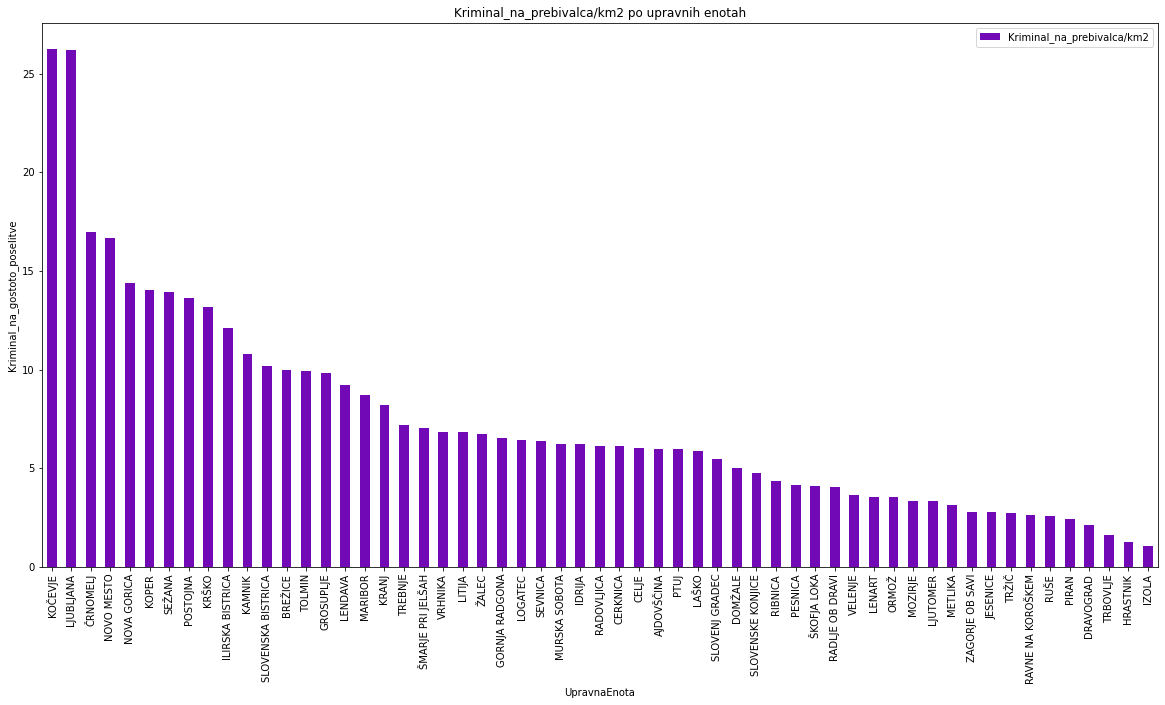

In [43]:
df = copy(dataFrame)
df.rename(columns={0: 'SteviloKriminala'}, inplace=True)
for index, row in df.iterrows():
    if  row['UpravnaEnotaStoritve'] in slovar:
        df.at[index, 'SteviloKriminala'] = int(row['SteviloKriminala'])/float(slovar[row['UpravnaEnotaStoritve']][2])
    else:
        df.drop(index, inplace=True)

df.sort_values(by=['SteviloKriminala'], ascending=False, inplace=True)
df.rename(columns={'SteviloKriminala': 'Kriminal_na_prebivalca/km2'}, inplace=True)
df.rename(columns={'UpravnaEnotaStoritve': 'UpravnaEnota'}, inplace=True)


#plt.bar(df['UpravnaEnota'], df['Kriminal_na_km2'], color="blue")
df.plot(kind='bar', ylabel='Kriminal_na_gostoto_poselitve',x='UpravnaEnota', title='Kriminal_na_prebivalca/km2 po upravnih enotah', figsize=(20,10), color=color_pallete[3])

Te grafi so izredno zanimivi saj nam namigujejo kje so bili do danes prebivalci najbolj kriminalno povezani. Grafi prikazujejo koliko kriminala se je zgodilo na prebivalca v vsem času. In koliko kriminala se naredi na kvardatin kilometer v vsem času. Ter koliko kriminala se naredi na gostoto prebivalca. Presenečata Kočevje in Murska sobota, ki v dveh grafih stopita na prvo mesto in celo premagata Ljubljano.

<AxesSubplot:title={'center':'Kriminal_na_prebivalca po upravnih enotah po letu 2018'}, xlabel='UpravnaEnota', ylabel='Kriminal_na_prebivalca'>

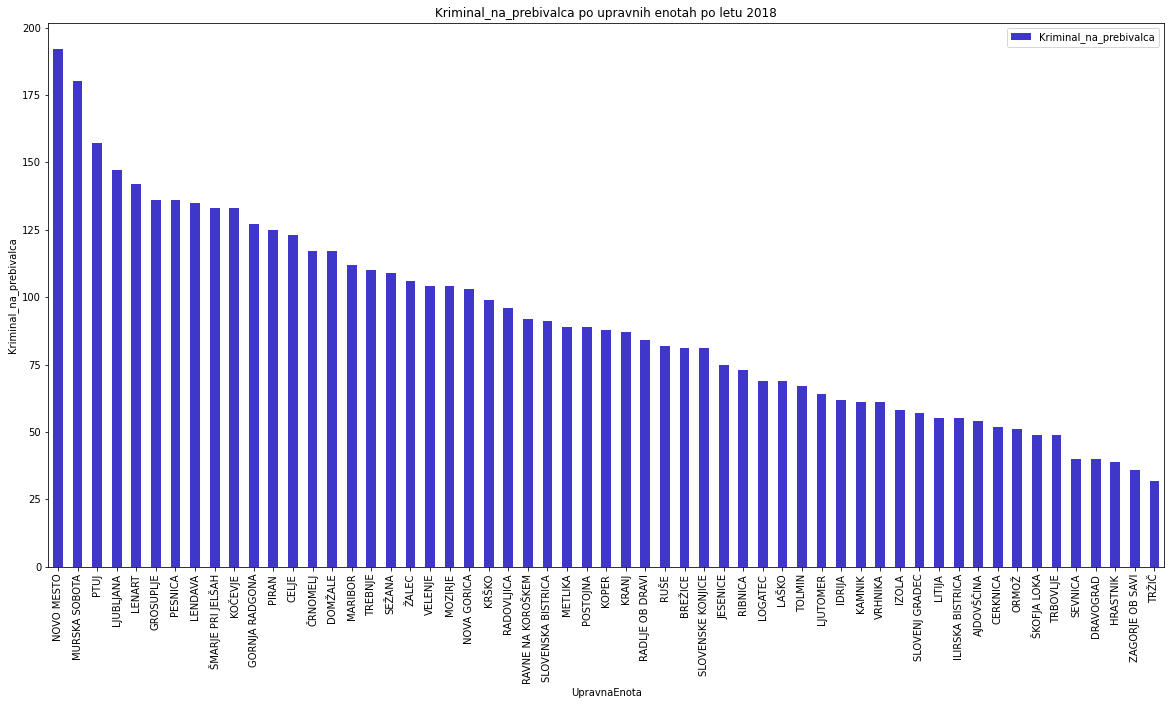

In [44]:
# ker se mi zdi pomembo da pogledamo se trenutno stanje kriminala po letu 2018
#after_2018_KD
df = pd.DataFrame(after_2018_KD.groupby(['UpravnaEnotaStoritve']).size().sort_values(ascending=False))
df.reset_index(inplace=True)
df.rename(columns={0: 'SteviloKriminala'}, inplace=True)
for index, row in df.iterrows():
    if  row['UpravnaEnotaStoritve'] in slovar:
        df.at[index, 'SteviloKriminala'] = int(row['SteviloKriminala'])/float(slovar[row['UpravnaEnotaStoritve']][1])
    else:
        df.drop(index, inplace=True)

df.sort_values(by=['SteviloKriminala'], ascending=False, inplace=True)
df.rename(columns={'SteviloKriminala': 'Kriminal_na_prebivalca'}, inplace=True)
df.rename(columns={'UpravnaEnotaStoritve': 'UpravnaEnota'}, inplace=True)


#plt.bar(df['UpravnaEnota'], df['Kriminal_na_km2'], color="blue")
df.plot(kind='bar', ylabel='Kriminal_na_prebivalca',x='UpravnaEnota', title='Kriminal_na_prebivalca po upravnih enotah po letu 2018', figsize=(20,10), color=color_pallete[7])


Naredil sem se graf za kriminal na prebivalca po letu 2018. Lahko opazimo da je novo mesto stopilo v ospredje. Murska soboa je na drugem mestu, Ptuj na tretjem.

## Pojavnost kriminala glede opis kraja po obcinah
Kakor lahko opazimo, je kriminal najgosteje **skoncentriran okoli nastavitvenih prostorov**, kar je obratno od prepričanja, da se kriminal najpogosteje dogaja na nekih temačnih ulicah, kjer bogate pare ropajo berači (Batman).

<AxesSubplot:title={'center':'Stevilo kaznivih dejanj po krajih'}, xlabel='OpisKraja', ylabel='Stevilo kaznivih dejanj'>

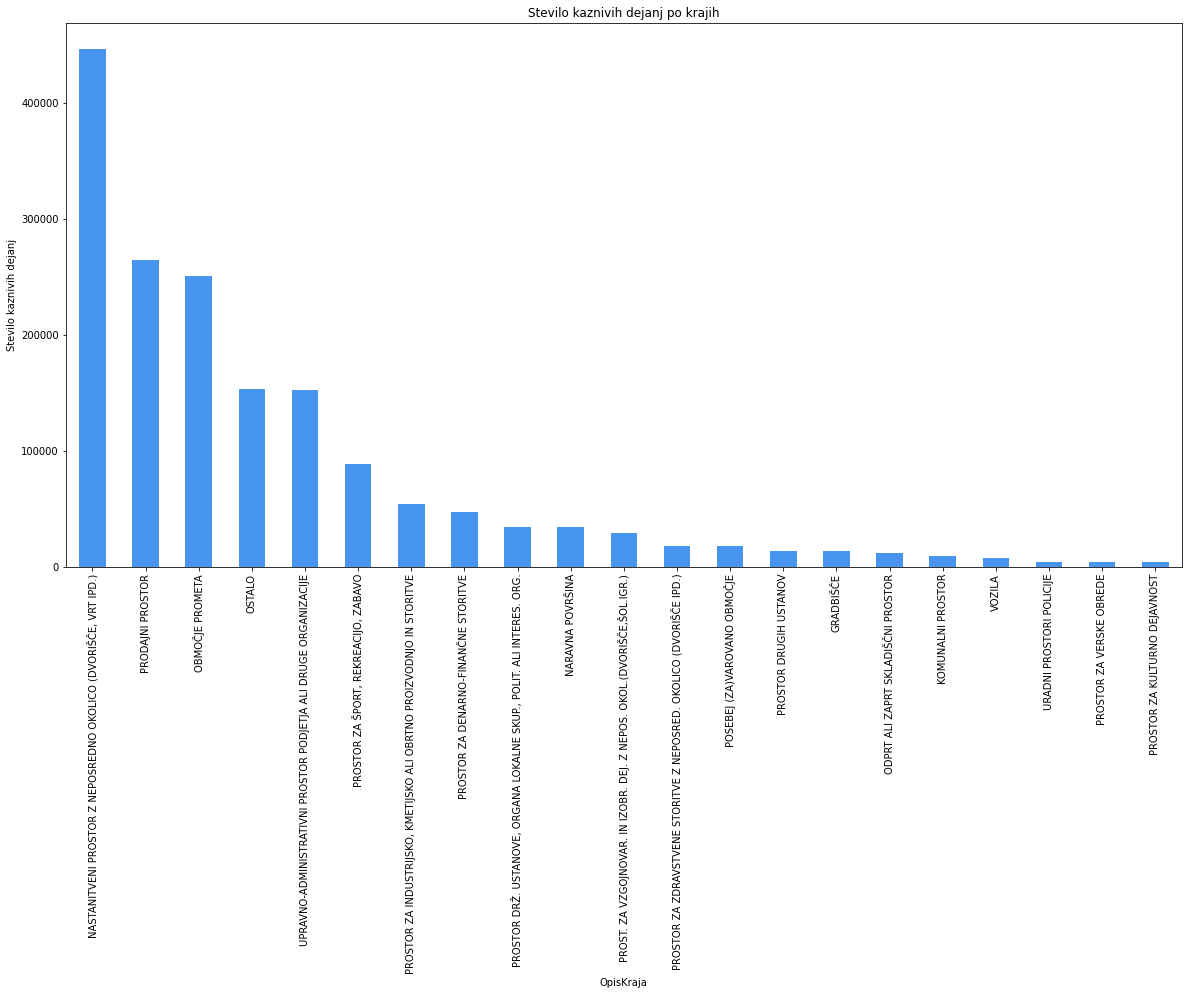

In [45]:

plt.figure(figsize=(20,10))
full_KD.groupby(['OpisKraja']).size().sort_values(ascending=False).plot(kind='bar', ylabel='Stevilo kaznivih dejanj', title='Stevilo kaznivih dejanj po krajih', color=color_pallete[9])


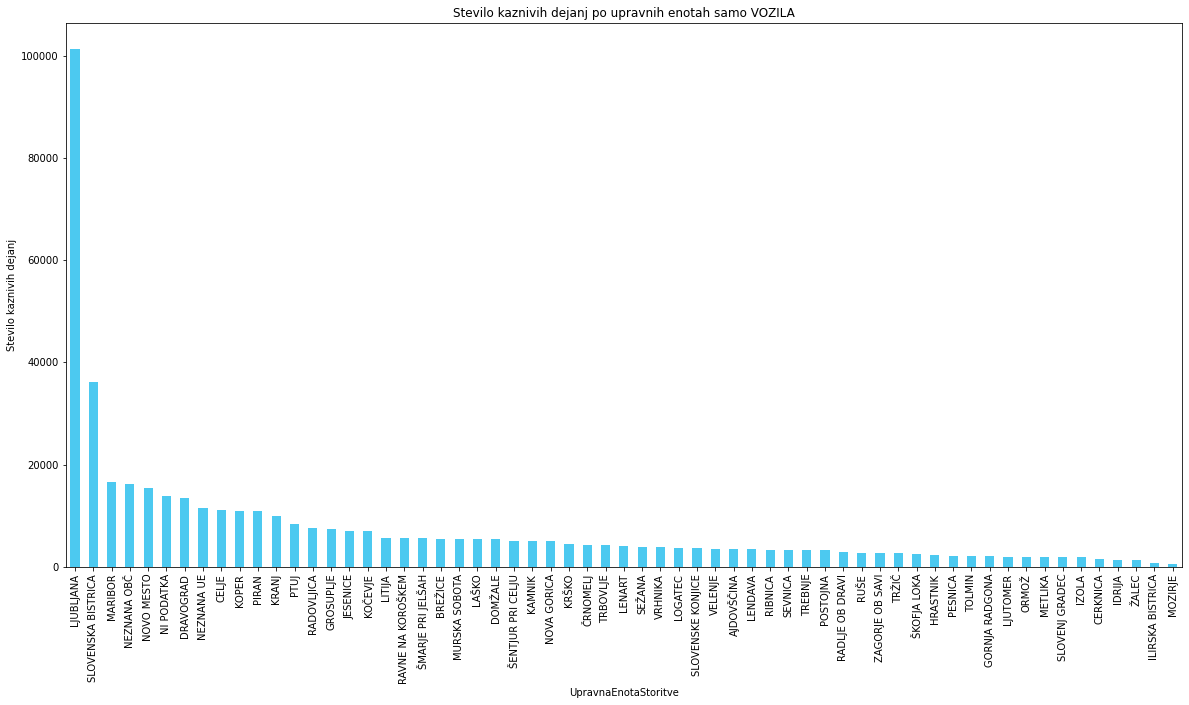

In [46]:
temp = pd.DataFrame(full_KD.groupby(['OpisKraja']))
sez = []
for index, row in temp.iterrows():
    sez.append(row[0])
# todo: pogruntej kako se vec grafou da v prazen prostor
plt.figure(figsize=(20,10))
for i in sez:
    full_KD[full_KD['OpisKraja'] == i].groupby(['UpravnaEnotaStoritve']).size().sort_values(ascending=False).plot(kind='bar', ylabel='Stevilo kaznivih dejanj', title='Stevilo kaznivih dejanj po upravnih enotah samo ' +i, color=color_pallete[10])


## Kriminal po policijskih upravah
Katera policijska uprava ima največ dela z kriminalci? To si lahko ogledamo spodaj...

<AxesSubplot:title={'center':'Stevilo kaznivih dejanj po PU'}, xlabel='PUStoritveKD', ylabel='Stevilo kaznivih dejanj'>

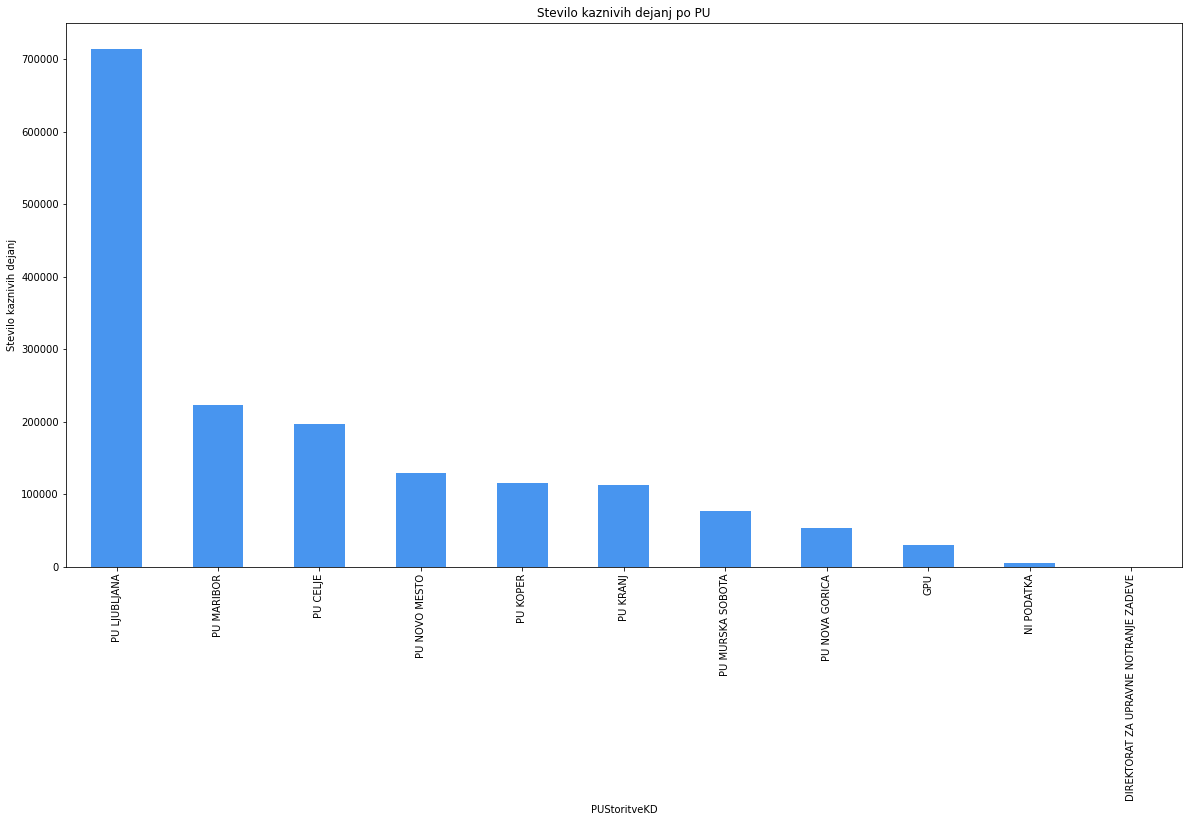

In [47]:
plt.figure(figsize=(20,10))
full_KD.groupby(['PUStoritveKD']).size().sort_values(ascending=False).plot(kind='bar', ylabel='Stevilo kaznivih dejanj', title='Stevilo kaznivih dejanj po PU', color=color_pallete[9])

Vidimo, da ima največ dela s kriminalom PU Ljubljana, na drugem mestu je Maribor, potem Celje...

# PRIKAZ PODATKOV GLEDE NA VRSTO KRIMINALA

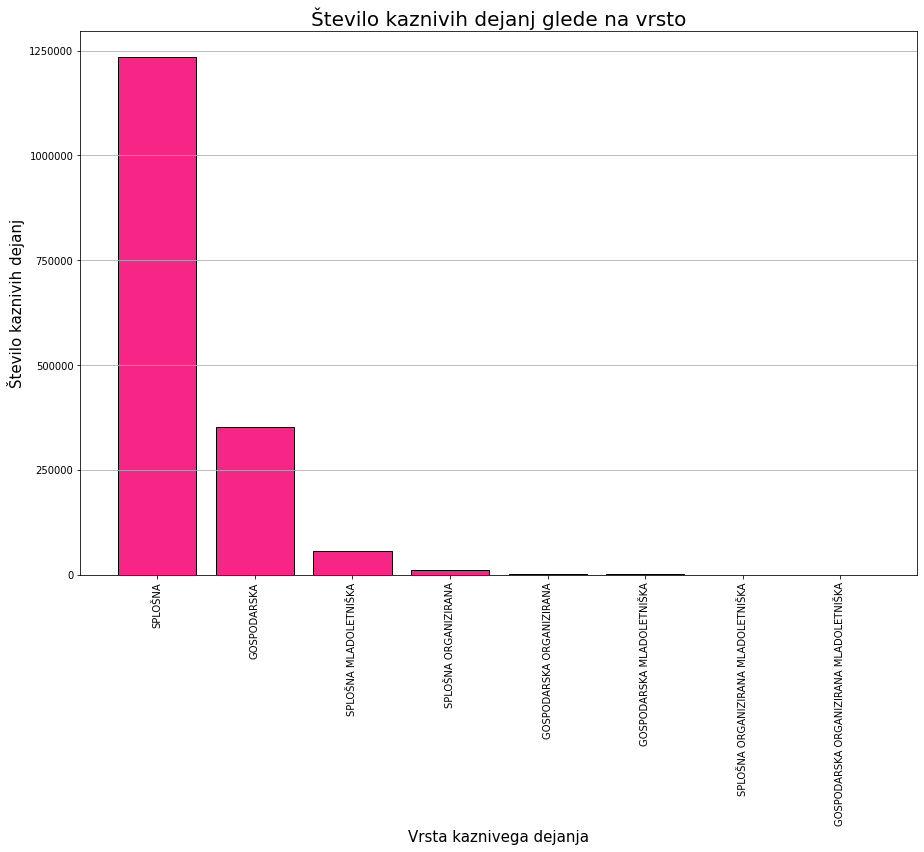

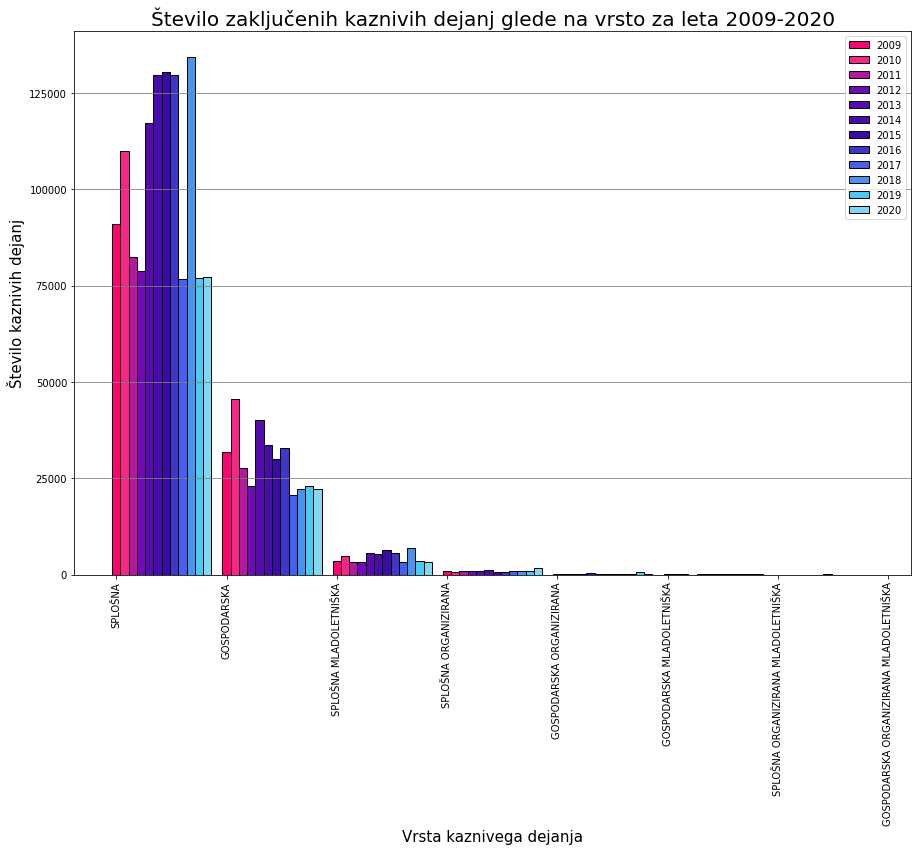

In [ ]:
crime_type_date_count = dict(zip(df_add.value_counts().index.tolist(), [0] * len(df_add.value_counts().index.tolist())))
crime_type_date_sum = dict(zip(df_add.value_counts().index.tolist(), [0] * len(df_add.value_counts().index.tolist())))
crime_type_date_avg = dict.fromkeys(df_add.value_counts().index.tolist())
crime_type_dataframes = {k:v for k,v in dataframes.items()}
crime_type_count = {}
df_add = None
df_add_all_years = []
y_list = []
colors = ['#FF0170', '#F72585', '#B5179E', '#7209B7', '#560BAD', '#480CA8', '#3A0CA3', '#3F37C9', '#4361EE', '#4895EF', '#4CC9F0', '#82D8F2']

for key, value in crime_type_dataframes.items():
    df1 = copy(crime_type_dataframes[key])
    df1["Test"] = df1[['GospodarskiKriminal', 'OrganiziranKriminal', 'MladoletniskaKriminaliteta']].stack().groupby(level=0).agg(' '.join)
    y_list.append([df1["Test"].value_counts()[0],df1["Test"].value_counts()[1],df1["Test"].value_counts()[2],df1["Test"].value_counts()[3],df1["Test"].value_counts()[4],df1["Test"].value_counts()[5],df1["Test"].value_counts()[6]])
    if (df_add is None):
        df_add = copy(df1["Test"])
    else:
        df_add = df_add.append(df1["Test"], ignore_index=True)
    df_add_all_years.append(df1)
    for col1, col2 in zip(df1["MesecStoritve"], df1["Test"]):
        #print(str(col1)[-4:], col2)
        #print(int(key[-4:]), col1)
        crime_type_date_sum[col2] += (int(key[-4:]) - int(str(col1)[-4:]))
        crime_type_date_count[col2] += 1

# Stevilo kaznivih dejanj glede na vrsto za vsa leta
plt.figure(figsize=(15,10))
plt.bar( df_add.value_counts().index.tolist(), df_add.value_counts(), color='#F72585', edgecolor='black')
plt.grid(axis='y')
plt.yticks(np.arange(0, 1300000, step=250000))
plt.title('Število kaznivih dejanj glede na vrsto', fontsize=20)
plt.xlabel('Vrsta kaznivega dejanja', fontsize=15)
plt.ylabel('Število kaznivih dejanj', fontsize=15)
plt.ticklabel_format(axis="y", style="plain")
plt.xticks(rotation=90)
plt.show();

        
# Stevilo zaključenih kaznivih dejanj glede na vrsto za leta 2009-2020
width = 0.9/len(y_list)
plt.figure(figsize=(15,10))
for i in range(len(y_list)):
    color = color_pallete[i]
    n=len(y_list[i])
    r = np.arange(n)
    plt.bar(r+width*i, y_list[i], color = color,
        width = width, edgecolor = 'black',
        label=str(2009+i))

plt.xticks(np.arange(8), df_add.value_counts().index.tolist(), rotation=90)
plt.title('Število zaključenih kaznivih dejanj glede na vrsto za leta 2009-2020', fontsize=20)
plt.xlabel('Vrsta kaznivega dejanja', fontsize=15)
plt.ylabel('Število kaznivih dejanj', fontsize=15)
plt.legend()
plt.grid(axis='y', color='gray')
plt.yticks(np.arange(0, 150000, step=25000));



**UGOTOVITVE**: Iz grafov lahko najprej razberemo, da je splošna vrsta kriminala najbolj pogosta. Posledica tega je tudi to, da pri naslednjem grafku največ zaključenih kaznivih dejanj splošne vrsteje. Prav tako lahko opazimo, da so vsa ostala kazniva dejanja, ki niso splošne ali gospodarske sorte, zelo redka. 

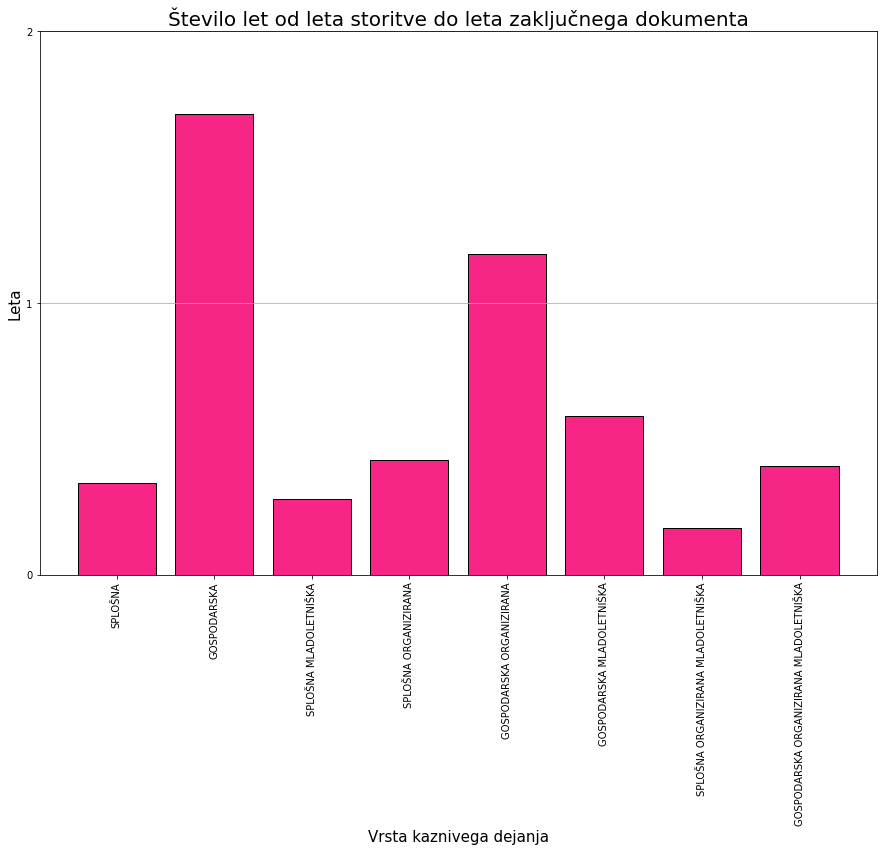

In [ ]:
for key in crime_type_date_avg:
    if (crime_type_date_count[key] != 0):
        crime_type_date_avg[key] = crime_type_date_sum[key] / crime_type_date_count[key]
    else:
        crime_type_date_avg[key] = 0
#crime_type_date_sum[col2] = (int(key[-4:]) - col1)
#crime_type_date_count[col2] += 1


plt.figure(figsize=(15,10))
plt.bar( df_add.value_counts().index.tolist(), crime_type_date_avg.values(), color='#F72585', edgecolor='black')
plt.grid(axis='y')
plt.yticks(np.arange(0, 3, step=1))
plt.title('Povprečno število let od leta storitve do leta zaključnega dokumenta', fontsize=20)
plt.xlabel('Vrsta kaznivega dejanja', fontsize=15)
plt.ylabel('Leta', fontsize=15)
plt.ticklabel_format(axis="y", style="plain")
plt.xticks(rotation=90)
plt.show();

**UGOTOVITVE**: opazimo, da je povprečno število let od storitve do zaključnega dokumenta leta pri vseh vrstah gospodarskih kaznivih dejanj večje, kot pa pri vseh vrstah splošnih kaznivih dejanj. Vrste mladoletniških kaznivih dejanj v vseh primerih v povprečju traja manj let, kot pa ne mladoletniška kazniva dejanja iste vrste. Pri tem je največja časovna razlika med gospodarsko organizirano mladoletniško in gospodarsko vrsto, najmanjša pa med splošno mladoletniško in splošno vrsto.